## Liver Patient Analysis

### INTRODUCTION: 
This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). 
Objective is to identify whether the patient has liver disease or not based on the input features.


<h3>Step 1 : Import Libraries and Dataset</h3>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD) (1).csv')

<h3>Step 2: Data Description </h3>


In [4]:
df.head(12)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Bilirubin is formed by the breakdown of red blood cells in the body. The liver helps to excrete it. High levels of bilirubin can lead to jaundice.

Bilirubin results depend on your age, gender, and health. Normal bilirubin levels are generally less than 1 milligram per deciliter (mg/dL). Adults with jaundice generally have bilirubin levels greater than 2.5mg/dL. In an otherwise healthy newborn, bilirubin levels greater than 15 mg/dL may cause problems.
The approximate normal range of bilirubin in the blood serum is:
1.2 milligrams per deciliter (mg/dL) for adults
1 mg/dL for children under 18 years of age
The skin normally becomes yellow once levels reach between 2 and 3 mg/dL.

Direct bilirubin
In the liver, bilirubin is changed into a form that your body can get rid of. This is called conjugated bilirubin or direct bilirubin. This bilirubin travels from the liver into the small intestine. A very small amount passes into your kidneys and is excreted in your urine.

It is normal to have some bilirubin in the blood. A normal level is:

Direct (also called conjugated) bilirubin: less than 0.3 mg/dL (less than 5.1 µmol/L)
Total bilirubin: 0.1 to 1.2 mg/dL (1.71 to 20.5 µmol/L)

A normal range for total protein is 60 to 80 grams per liter (g/L).
A normal range of albumin is 35 to 52 g/L 

An alkaline phosphatase level test (ALP test) measures the amount of alkaline phosphatase enzyme in your bloodstream. 
The normal range is 44 to 147 international units per liter (IU/L) or 0.73 to 2.45 microkatal per liter (µkat/L).

The normal range of SGPT to be present in the blood is about 7-56 units per liter of serum. 

The normal range is 3.4 to 5.4 g/dL (34 to 54 g/L)

The reference ranges for aspartate aminotransferase (AST) are as follows. Adults: 0-35 units/L or 0-0.58 μKat/L (SI units) (Values tend to be slightly lower in females than males.) Elderly: Values are slightly higher than those of other adults.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
liverdata = pd.DataFrame(df)
liverdata.shape

(583, 11)

In [7]:
liverdata.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<h3> Step 3: Check for missing values </h3>

In [8]:
missingvalue = liverdata.isnull().sum()
missingvalue

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

### Replace the blank cells with mean of the remaining cells of that column 'alkphos'

In [9]:
liverdata['alkphos'].mean()

0.9470639032815201

In [10]:
liverdata[liverdata['alkphos']==""] = np.NaN
liverdata['alkphos']= liverdata['alkphos'].fillna(liverdata['alkphos'].mean())

In [11]:
liverdata.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

### In the gender column replace male by '1' and female by '0'

In [12]:
liverdata.info()
liverdata['gender']=liverdata['gender'].apply(lambda x:1 if x=='Male' else 0)
liverdata.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    float64
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    float64
 5   albumin           583 non-null    float64
 6   ag_ratio          583 non-null    float64
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           583 non-null    float64
 10  is_patient        583 non-null    float64
dtypes: float64(10), object(1)
memory usage: 50.2+ KB


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0
5,46.0,1,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1.0
6,26.0,0,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1.0
7,29.0,0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1.0
8,17.0,1,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2.0
9,55.0,1,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1.0


In [13]:
print(liverdata['gender'].value_counts())

1    441
0    142
Name: gender, dtype: int64


In [14]:
liverdata['age']=liverdata['age'].astype(dtype='int64')
liverdata['tot_proteins']=liverdata['tot_proteins'].astype(dtype='int64')
liverdata['albumin']=liverdata['albumin'].astype(dtype='int64')
liverdata['ag_ratio']=liverdata['ag_ratio'].astype(dtype='int64')
liverdata['gender']=liverdata['gender'].astype(dtype='int64')

In [15]:
liverdata['is_patient'] = liverdata['is_patient'].astype(dtype='int64')

In [16]:
liverdata['is_patient'].value_counts()


1    416
2    167
Name: is_patient, dtype: int64

From the given dataset if is_patient = 1 ,then the person is a liver patient.
If is_patient = 2 , he is not a liver patient.
Out of 583 individuals of different age groups, 416 are liver patients.

In [17]:
liverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    int64  
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           583 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


<h3> Step 4: Data Visualization </h3>

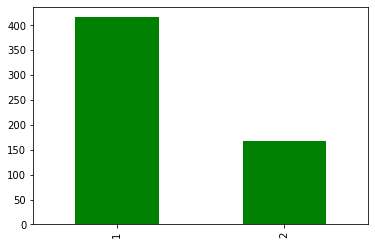

In [18]:
liverdata['is_patient'].value_counts().plot.bar(color='green')

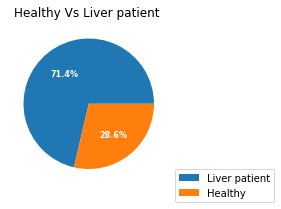

In [19]:
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
yvalue_count = liverdata['is_patient'].value_counts()

data = [yvalue_count[1], yvalue_count[2]]
ingredients = ["Liver patient",
          "Healthy"]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
         title= None ,
         loc="center left",
         bbox_to_anchor=(1, 0))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Healthy Vs Liver patient ")

plt.show()

It is observed that from the given dataset, 71.4 % of the data belongs to liver patients whereas only 28.6% belongs to healthy individuals.

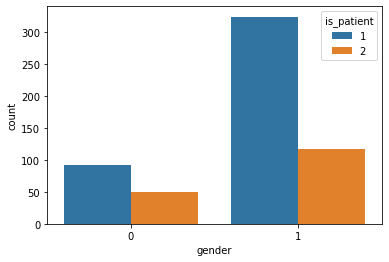

In [20]:
sns.countplot(liverdata['gender'],hue = liverdata['is_patient'])

In [21]:
Femalepatients = liverdata[(liverdata.gender == 0) & (liverdata.is_patient == 1)]
Femalepatients

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
13,74,0,1.1,0.4,214,22,30,8.1,4.1,1.00,1
18,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
537,10,0,0.8,0.1,395,25,75,7.6,3.6,0.90,1
544,54,0,5.5,3.2,350,67,42,7.0,3.2,0.80,1
547,50,0,27.7,10.8,380,39,348,7.1,2.3,0.40,1
549,40,0,2.1,1.0,768,74,141,7.8,4.9,1.60,1


Number of female liver patients are 92 out of 142 Females

In [22]:
Male_patients = liverdata[(liverdata.gender == 1) & (liverdata.is_patient == 1)]
Male_patients

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,1,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,1,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1


Number of Male liver patients out of 441 males = 324

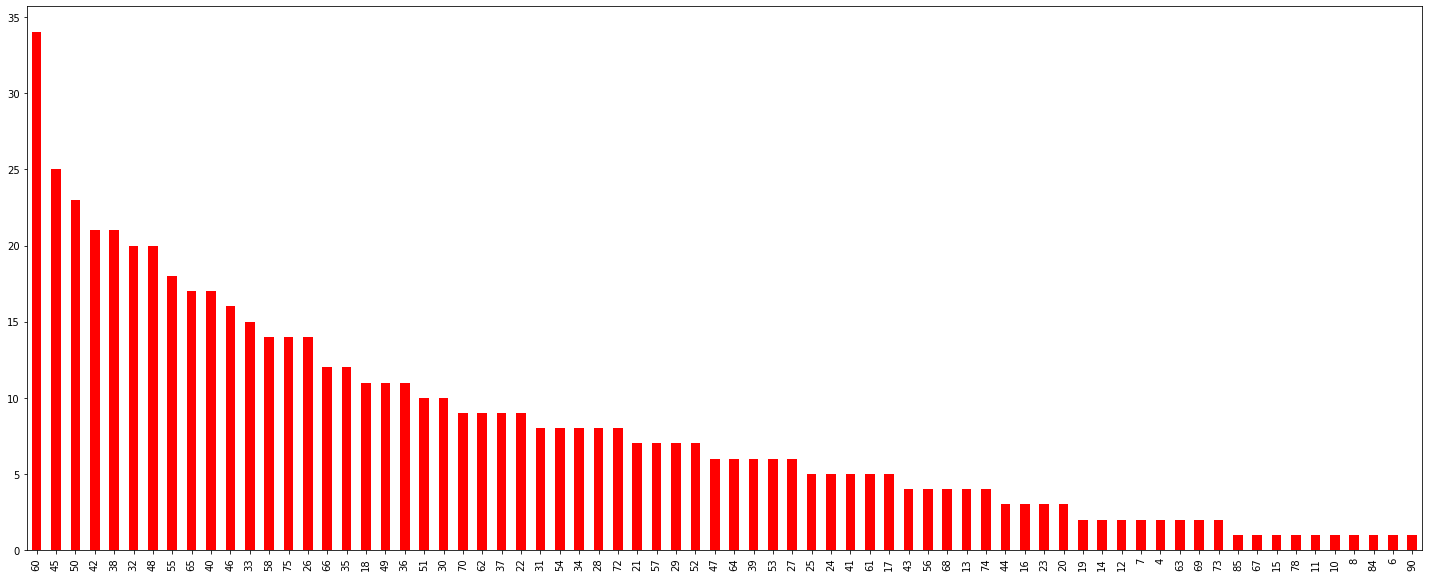

In [23]:
plt.figure(figsize=(25,10))
liverdata['age'].value_counts().plot.bar(color='red')

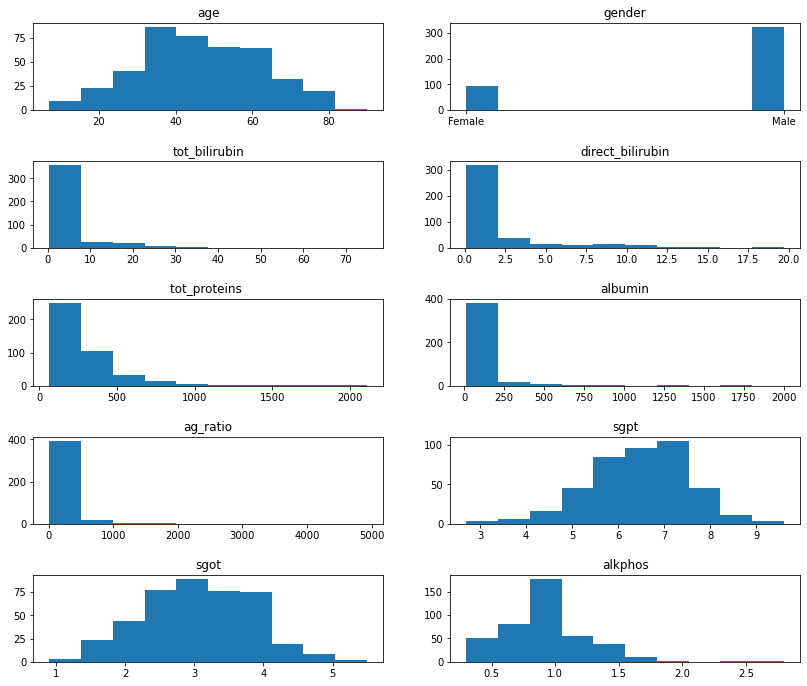

In [24]:
# Histogram of each feature
# Histogram of all coloumns when the Outcome is 1(LiverPatient)
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('age')
ax[0,0].hist(df.age[liverdata.is_patient==1]);
ax[0,1].set_title('gender')
ax[0,1].hist(df.gender[liverdata.is_patient==1]);
ax[1,0].set_title('tot_bilirubin')
ax[1,0].hist(df.tot_bilirubin[liverdata.is_patient==1]);
ax[1,1].set_title('direct_bilirubin')
ax[1,1].hist(df.direct_bilirubin[liverdata.is_patient==1]);
ax[2,0].set_title('tot_proteins ')
ax[2,0].hist(df.tot_proteins[liverdata.is_patient==1]);
ax[2,1].set_title('albumin')
ax[2,1].hist(df.albumin [liverdata.is_patient==1]);
ax[3,0].set_title('ag_ratio')
ax[3,0].hist(df.ag_ratio[liverdata.is_patient==1]);
ax[3,1].set_title('sgpt')
ax[3,1].hist(df.sgpt[liverdata.is_patient==1]);
ax[4,0].set_title('sgot')
ax[4,0].hist(df.sgot[liverdata.is_patient==1]);
ax[4,1].set_title('alkphos')
ax[4,1].hist(df.alkphos[liverdata.is_patient==1]);

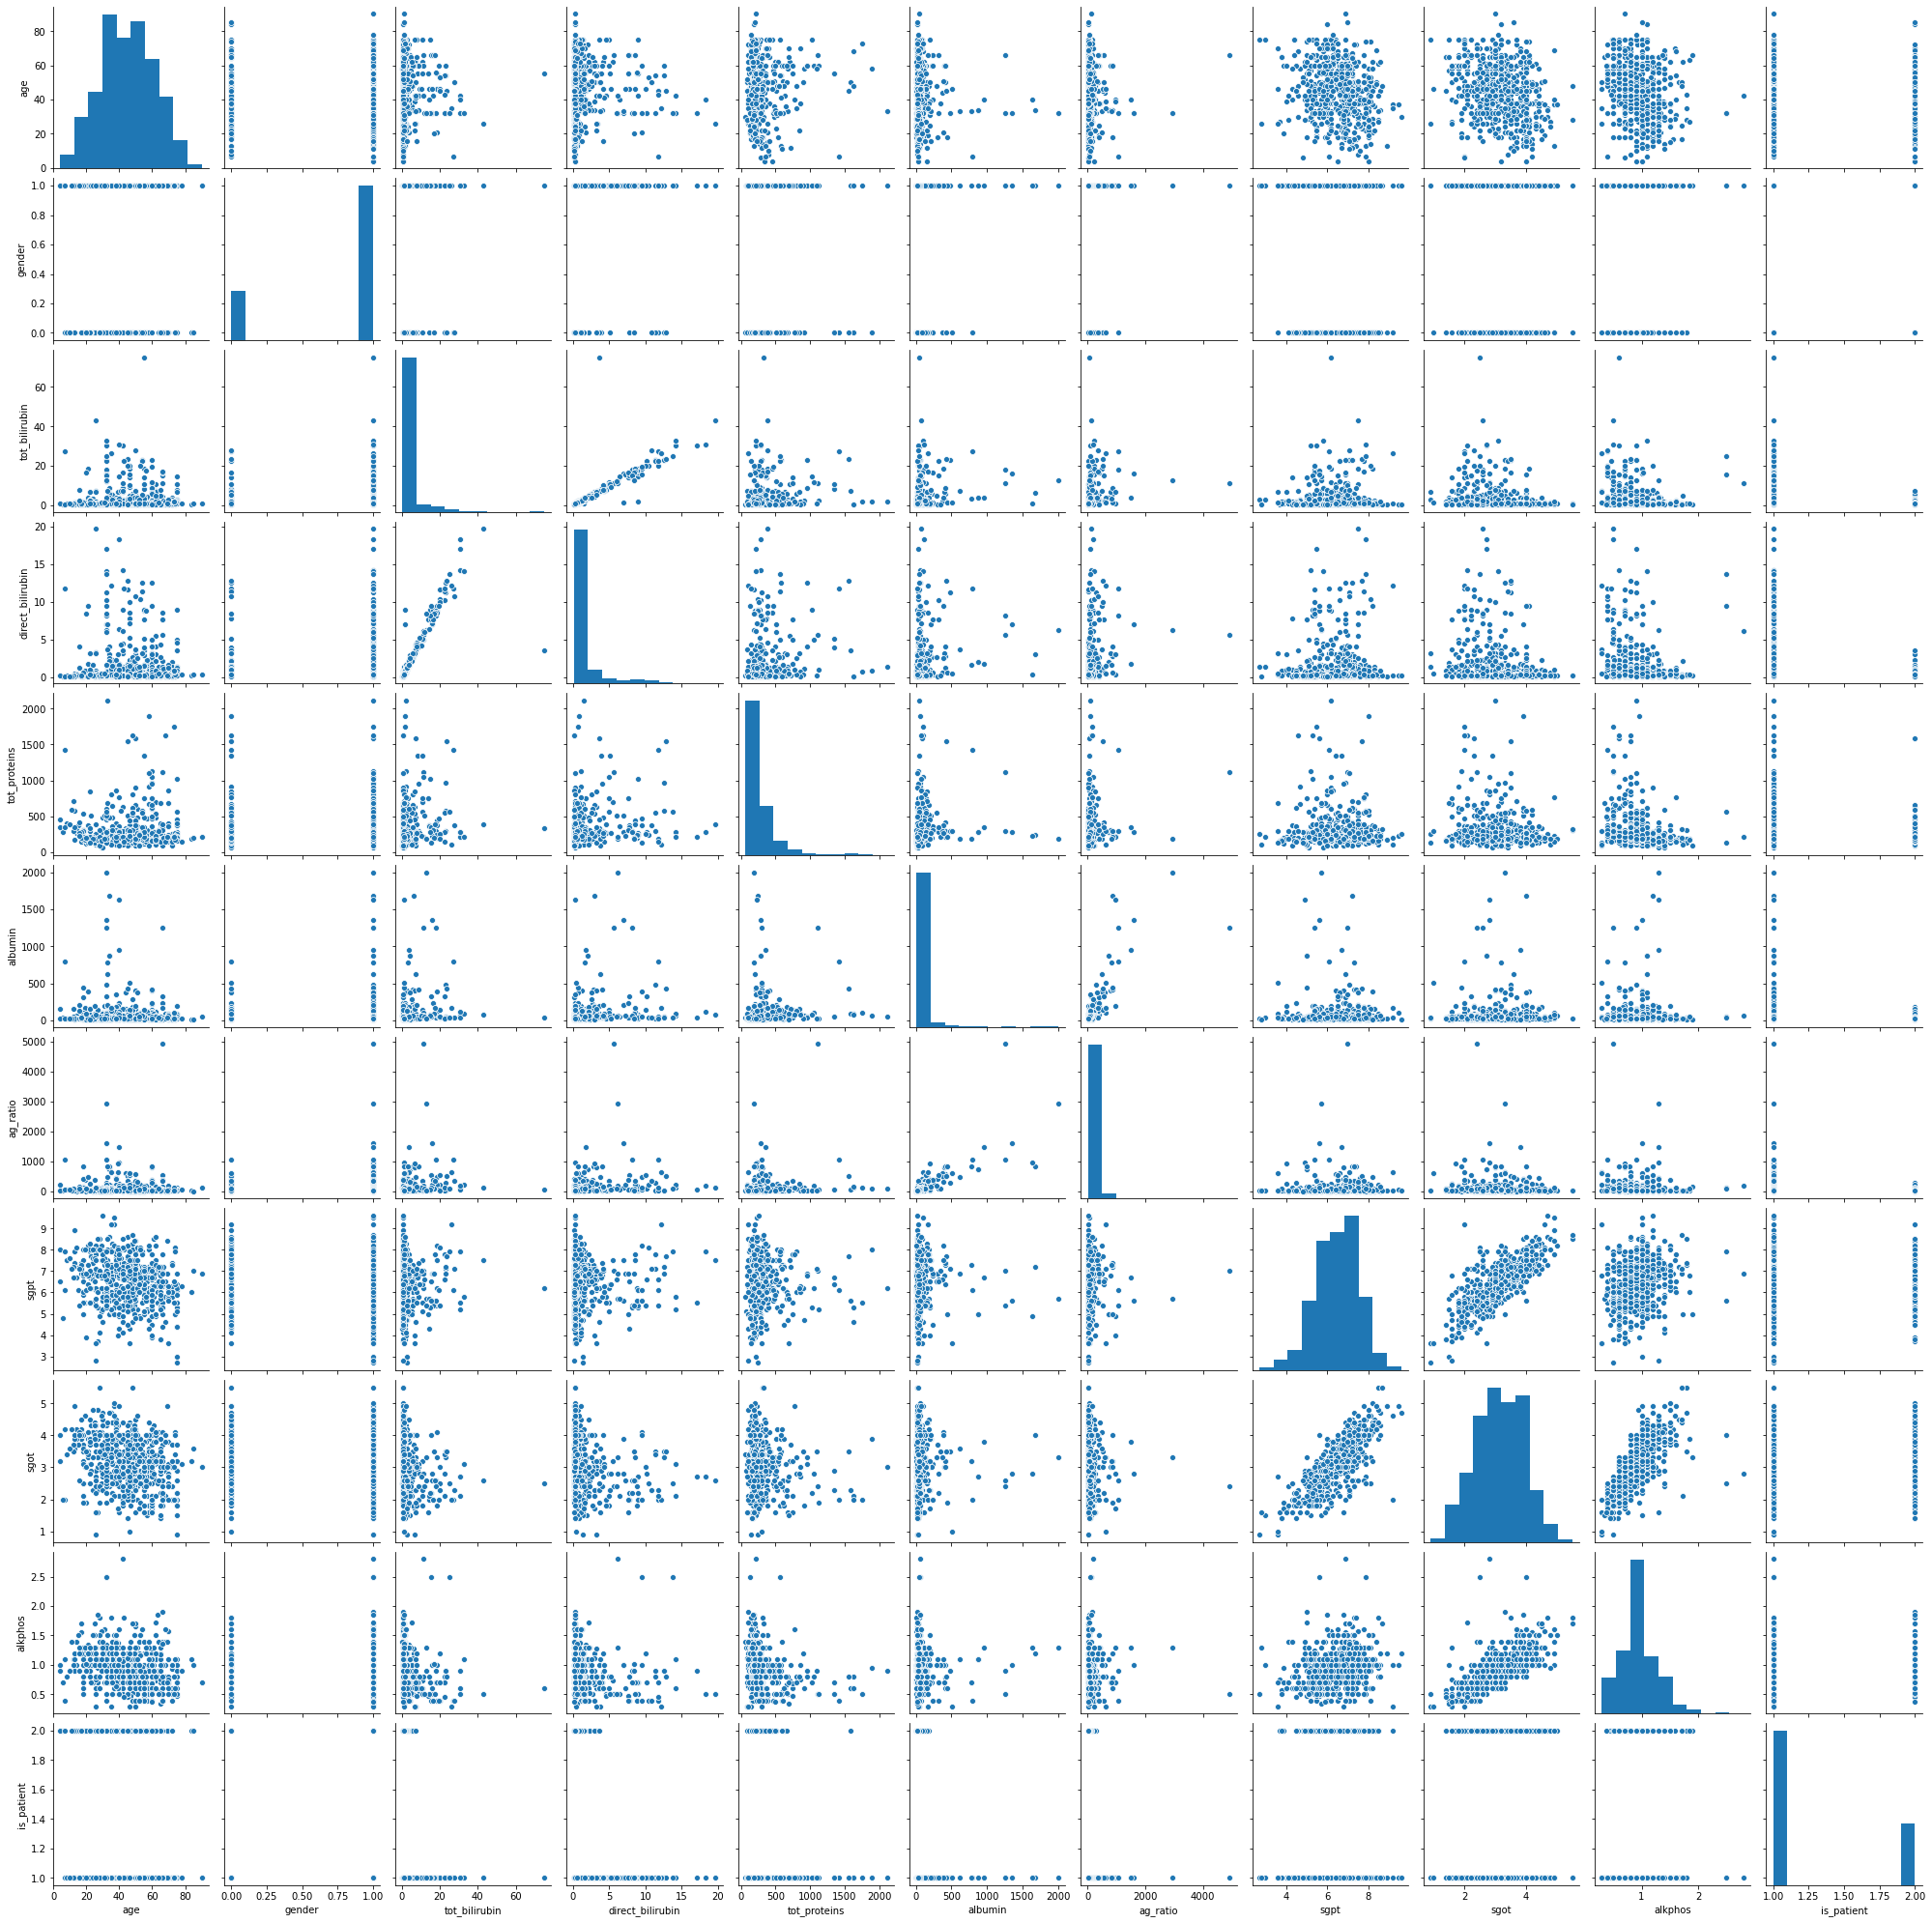

In [25]:
sns.pairplot(liverdata)

In [26]:
liverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    int64  
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           583 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


<h3> Step 5: Check for Skewness </h3>

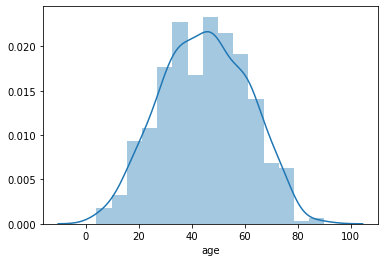

In [27]:
sns.distplot(liverdata['age'])

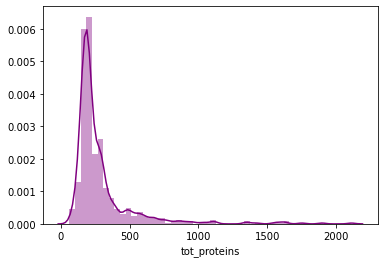

In [28]:
sns.distplot(liverdata['tot_proteins'],color = 'purple')

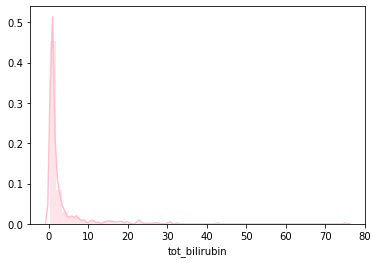

In [29]:
sns.distplot(liverdata['tot_bilirubin'],color = 'pink') #direct_bilirubin


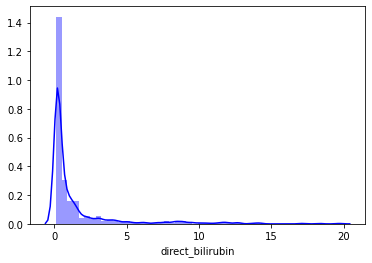

In [30]:
sns.distplot(liverdata['direct_bilirubin'],color = 'blue')

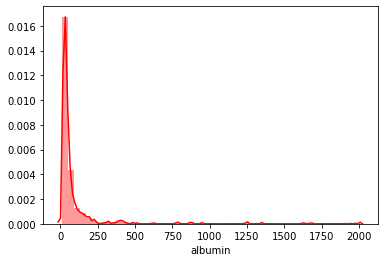

In [31]:
sns.distplot(liverdata['albumin'],color = 'red')

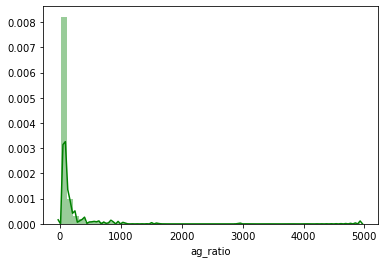

In [32]:
sns.distplot(liverdata['ag_ratio'],color = 'green')

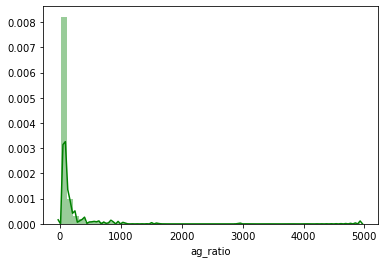

In [33]:
sns.distplot(liverdata['ag_ratio'],color = 'green')

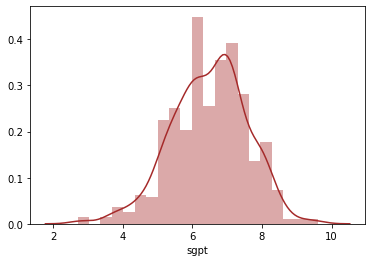

In [34]:
sns.distplot(liverdata['sgpt'],color = 'brown')

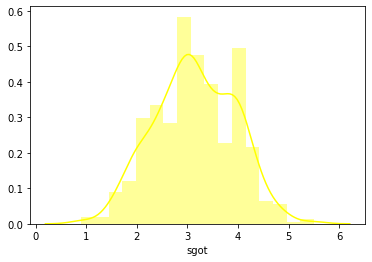

In [35]:
sns.distplot(liverdata['sgot'],color = 'yellow')

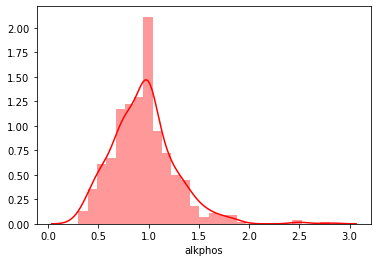

In [36]:
sns.distplot(liverdata['alkphos'],color = 'red')

In [37]:
liverdata['tot_bilirubin'].describe()

count    583.000000
mean       3.298799
std        6.209522
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: tot_bilirubin, dtype: float64

In [38]:
liverdata.tot_bilirubin = np.log(liverdata.tot_bilirubin)
liverdata.direct_bilirubin = np.log(liverdata.direct_bilirubin)
liverdata.tot_proteins = np.log(liverdata.tot_proteins)
liverdata.albumin  = np.log(liverdata.albumin)
liverdata.ag_ratio  = np.log(liverdata.ag_ratio)
liverdata.sgpt  = np.log(liverdata.sgpt)
liverdata.sgot  = np.log(liverdata.sgot)
liverdata.alkphos  = np.log(liverdata.alkphos)

In [39]:
liverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    int64  
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    float64
 5   albumin           583 non-null    float64
 6   ag_ratio          583 non-null    float64
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           583 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 50.2 KB


In [40]:
liverdata

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,1.916923,1.193922,-0.105361,1
1,62,1,2.388763,1.704748,6.549651,4.158883,4.605170,2.014903,1.163151,-0.301105,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,1.945910,1.193922,-0.116534,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,1.916923,1.223775,0.000000,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,1.987874,0.875469,-0.916291,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,-0.693147,-2.302585,6.214608,2.995732,3.526361,1.774952,0.470004,-0.994252,2
579,40,1,-0.510826,-2.302585,4.584967,3.555348,3.433987,1.791759,1.163151,0.095310,1
580,52,1,-0.223144,-1.609438,5.501258,3.871201,3.891820,1.856298,1.163151,0.000000,1
581,31,1,0.262364,-0.693147,5.214936,3.367296,3.465736,1.916923,1.223775,0.000000,1


In [41]:
liverdata.drop(['tot_bilirubin'],inplace = True , axis =1)

In [42]:
liverdata.head(12)

,age,gender,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,-2.302585,5.231109,2.772589,2.890372,1.916923,1.193922,-0.105361,1
1,62,1,1.704748,6.549651,4.158883,4.605170,2.014903,1.163151,-0.301105,1
2,62,1,1.410987,6.194405,4.094345,4.219508,1.945910,1.193922,-0.116534,1
3,58,1,-0.916291,5.204007,2.639057,2.995732,1.916923,1.223775,0.000000,1
4,72,1,0.693147,5.273000,3.295837,4.077537,1.987874,0.875469,-0.916291,1
5,46,1,-0.356675,5.337538,2.944439,2.639057,2.028148,1.481605,0.262364,1
6,26,0,-1.609438,5.036953,2.772589,2.484907,1.945910,1.252763,0.000000,1
7,29,0,-1.203973,5.308268,2.639057,2.397895,1.902108,1.280934,0.095310,1
8,17,1,-1.203973,5.308268,3.091042,2.944439,2.001480,1.410987,0.182322,2
9,55,1,-1.609438,5.669881,3.970292,4.060443,1.916923,1.223775,0.000000,1


In [43]:
liverdata.describe()

,age,gender,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,-0.650373,5.493417,3.751829,3.956771,1.853967,1.109217,-0.111148,1.286449
std,16.189833,0.429603,1.326394,0.528128,0.900236,0.997381,0.179611,0.276881,0.344547,0.452490
min,4.000000,0.000000,-2.302585,4.143135,2.302585,2.302585,0.993252,-0.105361,-1.203973,1.000000
25%,33.000000,1.000000,-1.609438,5.167635,3.135494,3.218876,1.757858,0.955511,-0.356675,1.000000
50%,45.000000,1.000000,-1.203973,5.337538,3.555348,3.737670,1.887070,1.131402,-0.054389,1.000000
75%,58.000000,1.000000,0.262364,5.697093,4.102609,4.465908,1.974081,1.335001,0.095310,2.000000
max,90.000000,1.000000,2.980619,7.654443,7.600902,8.502891,2.261763,1.704748,1.029619,2.000000


In [44]:
liverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    int64  
 2   direct_bilirubin  583 non-null    float64
 3   tot_proteins      583 non-null    float64
 4   albumin           583 non-null    float64
 5   ag_ratio          583 non-null    float64
 6   sgpt              583 non-null    float64
 7   sgot              583 non-null    float64
 8   alkphos           583 non-null    float64
 9   is_patient        583 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 45.7 KB


<h3> Step 6: Check the correlation </h3>

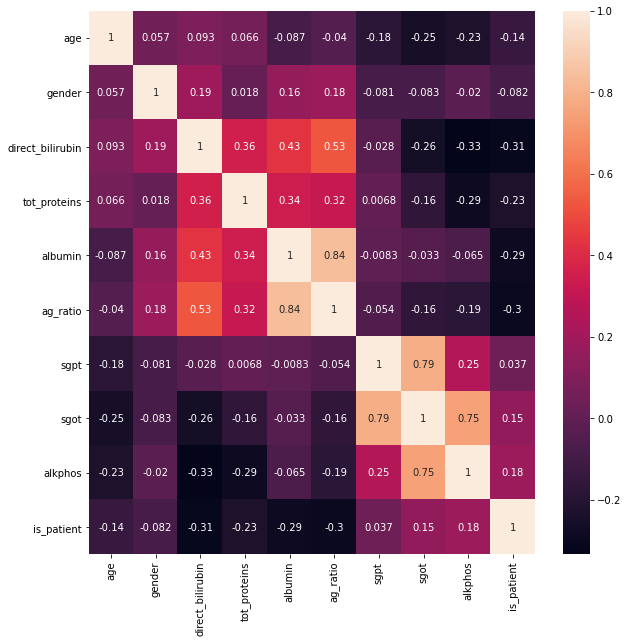

In [45]:
corr = liverdata.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data =corr,annot = True)

<h3> Step 7 : Check if any columns contain + or -inf.If so, replace it by nan

In [46]:
liverdata.loc[liverdata['alkphos'] == -np.inf]
liverdata.loc[liverdata['ag_ratio'] == -np.inf]
liverdata.loc[liverdata['albumin'] == -np.inf]
liverdata.loc[liverdata['tot_proteins'] == -np.inf]
liverdata.loc[liverdata['direct_bilirubin'] == -np.inf]
#Check if -ve or +ve infinity present in other columns. It is not present.So neednot replace with NaN

,age,gender,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient


<h3> Step 8: Split the data into x and y where y contains the last column and x includes all the other columns. </h3>

In [47]:
x = liverdata.iloc[:,0:9].values 
y = liverdata.iloc[:,9].values

<h3> Step 9: Split it into train(80%) and test(20%) data </h3>

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = liverdata['is_patient'])

In [49]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (466, 9)
X_test shape: (117, 9)
Y_train shape: (466,)
Y_test shape: (117,)


<h3> Step 10: Use different machine learning models to fit the data </h3>

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [51]:
logreg = LogisticRegression(random_state=42)
clf = logreg.fit(X_train, y_train)

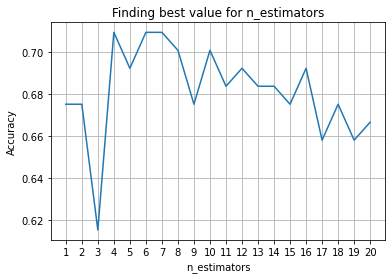

Highest value:  0.7094017094017094


In [52]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 21))
acc = pd.Series()
X = range(1,21)

for i in list(range(1, 21)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(X_axis, acc)
plt.xticks(X)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [53]:
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
model = knn.fit(X_train, y_train)

In [54]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [55]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [56]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [57]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [58]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

<h3> Step 11: Evaluate the models using evaluation metrices and choose the best model </h3>

In [59]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
precision_logreg = precision_score(y_test, Y_pred_logreg)
recall_logreg = recall_score(y_test, Y_pred_logreg)
f1_logreg = f1_score(y_test, Y_pred_logreg)


In [60]:
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
precision_knn = precision_score(y_test, Y_pred_knn)
recall_knn = recall_score(y_test, Y_pred_knn)
f1_knn = f1_score(y_test, Y_pred_knn)


In [61]:
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
precision_svc = precision_score(y_test, Y_pred_svc)
recall_svc = recall_score(y_test, Y_pred_svc)
f1_svc = f1_score(y_test, Y_pred_svc)


In [62]:
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
precision_nb = precision_score(y_test, Y_pred_nb)
recall_nb = recall_score(y_test, Y_pred_nb)
f1_nb = f1_score(y_test, Y_pred_nb)


In [63]:
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
precision_dectree = precision_score(y_test, Y_pred_dectree)
recall_dectree = recall_score(y_test, Y_pred_dectree)
f1_dectree = f1_score(y_test, Y_pred_dectree)


In [64]:
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)
precision_ranfor = precision_score(y_test, Y_pred_ranfor)
recall_ranfor = recall_score(y_test, Y_pred_ranfor)
f1_ranfor = f1_score(y_test, Y_pred_ranfor)

In [65]:
model_compare = pd.DataFrame({"Logistic Regression":[accuracy_logreg,precision_logreg,recall_logreg,f1_logreg], 
                            "KNN":[accuracy_knn,precision_knn,recall_knn,f1_knn],
                              "Naive Bayes":[accuracy_nb,precision_nb,recall_nb,f1_nb],
                              "Decision Tree Classifier":[accuracy_dectree,precision_dectree,recall_dectree,f1_dectree],
                            "Random Forest Classifier":[accuracy_ranfor,precision_ranfor,recall_ranfor,f1_ranfor],
                           "Support Vector Machine":[accuracy_svc,precision_svc,recall_svc,f1_svc]
                            },index=["accuracy","precision","recall","f1 score"])
model_compare

,Logistic Regression,KNN,Naive Bayes,Decision Tree Classifier,Random Forest Classifier,Support Vector Machine
accuracy,0.709402,0.709402,0.658120,0.564103,0.632479,0.709402
precision,0.742574,0.752577,0.890909,0.695122,0.712766,0.709402
recall,0.903614,0.879518,0.590361,0.686747,0.807229,1.000000
f1 score,0.815217,0.811111,0.710145,0.690909,0.757062,0.830000


<h3> Step 13

In [195]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred_logreg)

array([[75,  8],
       [26,  8]], dtype=int64)

In [196]:
import pickle

In [197]:
pickle.dump(logreg,open("logregliverpatient.pkl",'wb'))

In [198]:
map = {1:"Yes",2:"No"}

In [199]:
a = pickle.load(open("logregliverpatient.pkl",'rb'))

In [200]:
b = a.predict([[65.0,0,0.1,187.0,16.0,18.0,6.8,3.3,0.90]])
val = int(b)
print("Is the person a liver patient ?:",map[val])

Is the person a liver patient ?: Yes


In [201]:
b = a.predict([[17.0,0,-1.203973,5.308268,3.091042,2.944439,2.001480,1.410987,0.182322]])
val = int(b)
print("Is the person a liver patient ?:",map[val])



Is the person a liver patient ?: No
